# AITT Assignment
## Group 4: Gin & Ethan

In [130]:
# Import the necessary modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
# Read the dataset
df = pd.read_csv("vulnerabilities-dataset-1.csv")

In [46]:
df

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,CVE-2007-5659,adobe,Acrobat and Reader,Adobe Acrobat and Reader Buffer Overflow Vulne...,2022-06-08,Adobe Acrobat and Reader contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2008-02-12,NaN,CWE-119,NaN,NaN,NaN
773,CVE-2006-2492,microsoft,Word,Microsoft Word Malformed Object Pointer Vulner...,2022-06-08,Microsoft Word and Microsoft Works Suites cont...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2006-05-20,NaN,NVD-CWE-Other,NaN,NaN,NaN
774,CVE-2021-38163,sap,NetWeaver,SAP NetWeaver Unrestricted File Upload vulnera...,2022-06-09,SAP NetWeaver contains a vulnerability that al...,Apply updates per vendor instructions.,2022-06-30,NaN,38,2021-09-14,8.8,CWE-434,NETWORK,LOW,HIGH
775,CVE-2016-2386,sap,NetWeaver,SAP NetWeaver SQL Injection Vulnerability,2022-06-09,SQL injection vulnerability in the UDDI server...,Apply updates per vendor instructions.,2022-06-30,NaN,38,2016-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL


In [47]:
# Remove the NaN category.
df = df.drop(columns=['notes'])

In [48]:
# Re-print the dataframe with the updates.
df

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,CVE-2007-5659,adobe,Acrobat and Reader,Adobe Acrobat and Reader Buffer Overflow Vulne...,2022-06-08,Adobe Acrobat and Reader contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,37,2008-02-12,NaN,CWE-119,NaN,NaN,NaN
773,CVE-2006-2492,microsoft,Word,Microsoft Word Malformed Object Pointer Vulner...,2022-06-08,Microsoft Word and Microsoft Works Suites cont...,Apply updates per vendor instructions.,2022-06-22,37,2006-05-20,NaN,NVD-CWE-Other,NaN,NaN,NaN
774,CVE-2021-38163,sap,NetWeaver,SAP NetWeaver Unrestricted File Upload vulnera...,2022-06-09,SAP NetWeaver contains a vulnerability that al...,Apply updates per vendor instructions.,2022-06-30,38,2021-09-14,8.8,CWE-434,NETWORK,LOW,HIGH
775,CVE-2016-2386,sap,NetWeaver,SAP NetWeaver SQL Injection Vulnerability,2022-06-09,SQL injection vulnerability in the UDDI server...,Apply updates per vendor instructions.,2022-06-30,38,2016-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL


In [49]:
# Check basic information regarding the dataset.
df.describe()

,grp,cvss
count,777.000000,612.000000
mean,13.528958,8.420261
std,12.296362,1.305865
min,1.000000,3.100000
25%,1.000000,7.800000
50%,16.000000,8.800000
75%,20.000000,9.800000
max,38.000000,10.000000


#### From the above .describe(), we can tell that there are 777 total rows but only 612 of them have values for the CVSS column. We need to drop the ones without their CVSS defined so our model can effectively predict and show us relevant results.

In [50]:
df = df.drop_duplicates()
df = df.dropna()
df = df[df["cvss"] != "NA"]
df


,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,CVE-2016-5198,google,Chromium V8 Engine,Google Chromium V8 Out-of-Bounds Memory Vulner...,2022-06-08,Google Chromium V8 Engine contains an out-of-b...,Apply updates per vendor instructions.,2022-06-22,37,2017-01-19,8.8,"CWE-125,CWE-787",NETWORK,LOW,HIGH
753,CVE-2016-1646,google,Chromium V8 Engine,Google Chromium V8 Out-of-Bounds Read Vulnerab...,2022-06-08,Google Chromium V8 contains an out-of-bounds r...,Apply updates per vendor instructions.,2022-06-22,37,2016-03-29,8.8,CWE-119,NETWORK,LOW,HIGH
774,CVE-2021-38163,sap,NetWeaver,SAP NetWeaver Unrestricted File Upload vulnera...,2022-06-09,SAP NetWeaver contains a vulnerability that al...,Apply updates per vendor instructions.,2022-06-30,38,2021-09-14,8.8,CWE-434,NETWORK,LOW,HIGH
775,CVE-2016-2386,sap,NetWeaver,SAP NetWeaver SQL Injection Vulnerability,2022-06-09,SQL injection vulnerability in the UDDI server...,Apply updates per vendor instructions.,2022-06-30,38,2016-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL


In [51]:
df.describe()
# as these values now show that the count for both columns are the same, it shows that we have successfully dropped all NA values from df.

,grp,cvss
count,604.000000,604.000000
mean,11.067881,8.427649
std,11.653811,1.307529
min,1.000000,3.100000
25%,1.000000,7.800000
50%,6.000000,8.800000
75%,19.000000,9.800000
max,38.000000,10.000000


In [53]:
# To complete data cleaning, we will drop all columns which will not be used for the assignment.
df_clean = df[['cvss','complexity']]
df_clean
#df_clean is the dataframe we will use for the next parts of the assignment.

,cvss,complexity
0,9.8,LOW
1,7.8,LOW
2,9.8,LOW
3,9.8,LOW
4,8.8,LOW
...,...,...
752,8.8,LOW
753,8.8,LOW
774,8.8,LOW
775,9.8,LOW


In [54]:
df_clean.dtypes
# Checking the types of the data in the new df to ensure that they are correct.

cvss          float64
complexity     object
dtype: object

In [112]:

# Importing sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [56]:
mapping = {"LOW": 1.0, "MEDIUM": 2.0, "HIGH": 3.0}
df_clean["complexity"] = df_clean["complexity"].map(mapping)
# using map to change the complexities to numerical values 

C:\Users\ginko\AppData\Local\Temp\ipykernel_24792\3681693607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["complexity"] = df_clean["complexity"].map(mapping)


In [57]:
df_clean

,cvss,complexity
0,9.8,1.0
1,7.8,1.0
2,9.8,1.0
3,9.8,1.0
4,8.8,1.0
...,...,...
752,8.8,1.0
753,8.8,1.0
774,8.8,1.0
775,9.8,1.0


In [58]:
df_clean.isnull().sum()
# checking again for null values

cvss          0
complexity    0
dtype: int64

In [59]:
df_clean.cov()

,cvss,complexity
cvss,1.709632,-0.207697
complexity,-0.207697,0.331620


In [60]:
df_clean.corr()

,cvss,complexity
cvss,1.000000,-0.275841
complexity,-0.275841,1.000000


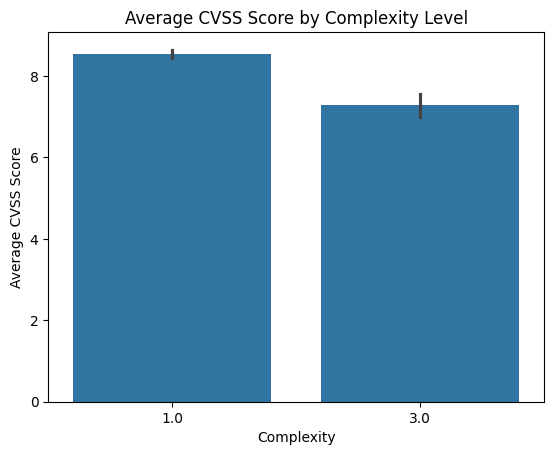

In [ ]:
sns.barplot(x='complexity', y='cvss', data=df_clean)
plt.title('Average CVSS Score by Complexity Level')
plt.xlabel('Complexity')
plt.ylabel('Average CVSS Score')
plt.show()
# where 1.0 is LOW and 3.0 is HIGH complexity

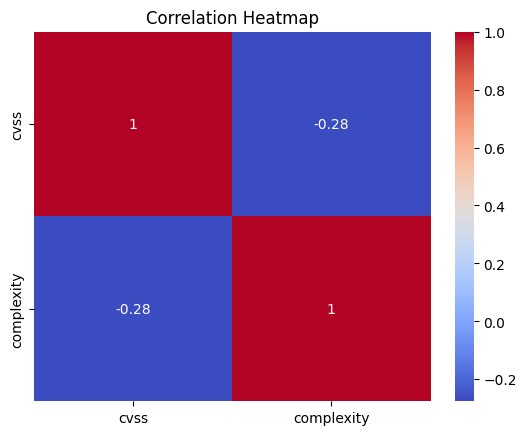

In [114]:
corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [71]:
x = df_clean[['complexity']]
y = df_clean['cvss']
x_train, x_test, y_train, y_test = train_test_split(x, y)


In [72]:
# checking datatypes of both x_train and y_train
x_train.dtypes
y_train.dtypes

dtype('float64')

In [87]:
lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression()

In [119]:
l_prediction = lin.predict(x_test)


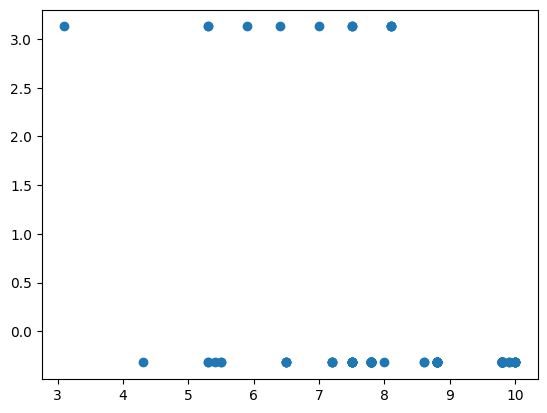

In [ ]:
plt.scatter(y_test, x_test)
# using a scatterplot to visualise
# as we have no medium complexity values,
plt.show()

In [89]:
# Standard Scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [102]:
knn = KNeighborsRegressor(n_neighbors=25)
# using n = 25 as it is the closest value to square root 600.

In [110]:
df_clean['cvss'].value_counts()



cvss
9.8     182
7.8     127
8.8     103
7.5      56
8.1      18
10.0     17
6.5      16
7.2      13
5.3       9
5.5       8
4.3       7
6.1       6
8.6       5
7.0       5
9.1       4
5.9       4
9.6       3
9.9       3
8.4       2
6.3       2
5.4       2
9.0       2
6.6       1
6.8       1
7.1       1
4.9       1
7.4       1
8.0       1
4.7       1
6.4       1
8.2       1
3.1       1
Name: count, dtype: int64

In [103]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=25)

In [121]:
#knn predictions
k_predictions = knn.predict(x_test)
k_predictions

array([8.496, 7.512, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 8.496, 8.496, 8.496, 7.512, 8.496, 8.496, 8.496, 8.496,
       8.496, 8.496, 8.496, 7.512, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 7.512, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 7.512, 8.496, 8.496,
       8.496, 8.496, 8.496, 8.496, 7.512, 8.496, 8.496, 7.512, 8.496,
       8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 7.512, 7.512, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 7.512, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 8.496, 7.512, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496, 8.496,
       8.496, 8.496,

In [131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [133]:
# Evaluate kNN prediction
mae_knn = mean_absolute_error(y_test, knn.predict(x_test))
mse_knn = mean_squared_error(y_test, knn.predict(x_test))
r2_knn = r2_score(y_test, knn.predict(x_test))
# Evaluate Linear Regression prediction
mae_lr = mean_absolute_error(y_test, lin.predict(x_test))
mse_lr = mean_squared_error(y_test, lin.predict(x_test))
r2_lr = r2_score(y_test, lin.predict(x_test))

# Print results
print("kNN Performance:")
print(f"MAE: {mae_knn}, MSE: {mse_knn}, R²: {r2_knn}")

print("\nLinear Regression Performance:")
print(f"MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")

kNN Performance:
MAE: 1.087788079470199, MSE: 1.6839660927152322, R²: 0.11096858946900467

Linear Regression Performance:
MAE: 1.0856781461557414, MSE: 1.6733621074512792, R²: 0.1165668470688721


##### Based on these results, we will choose to use the prediction from our Linear Regression as our prediction value. It has a lower MAE/MSE value and a higher R2 value compared to the KNN prediction value.